In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models
from scipy import optimize
from Pymod import prep
from plotter import semlog
%matplotlib inline
%load_ext autoreload

In [2]:
WT_08_lbl, WT_08_rtot, WT_08_lig, WT_08_sat = prep.datprep('Data/EGFR_WT_08_Sat.csv','Data/EGFR_WT_08_Rtot.csv')

hootie hoo! the indices match!


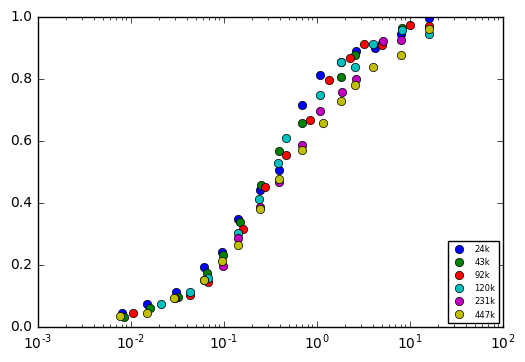

In [3]:
semlog(WT_08_lig,WT_08_sat,WT_08_lbl)

In [41]:
k11r = np.clip(np.random.normal(4.6,0.6,10000),.0000001,np.inf)
k21r = np.clip(np.random.normal(5.3,0.4,10000),.0000001,np.inf)
k22r = np.clip(np.random.normal(0.34,0.11,10000),.0000001,np.inf)
l20r = np.clip(np.random.normal(530.,220.,10000),.0000001,np.inf)

In [5]:
len(WT_08_rtot)

6

In [8]:
bounds = tuple(0.0 for i in range(6)),tuple(1.0 for i in range(6))

In [28]:
bounds

((0.0, 0.0, 0.0, 0.0, 0.0, 0.0), (1.0, 1.0, 1.0, 1.0, 1.0, 1.0))

In [42]:
parmset2 = np.stack([k11r,k21r,k22r,l20r],1)

In [43]:
parmset2[3]

array([   3.4717297 ,    5.67834473,    1.        ,  531.86376703])

In [20]:
rtots = WT_08_rtot

In [21]:
del(rtotset)

In [22]:
type(rtots)

list

In [23]:
#see above, rtots should be returned as numpy array from prep module --- just edited, let's reload and see if it works
%autoreload

In [24]:
WT_08_lbl, WT_08_rtot, WT_08_lig, WT_08_sat = prep.datprep('Data/EGFR_WT_08_Sat.csv','Data/EGFR_WT_08_Rtot.csv')

hootie hoo! the indices match!


In [26]:
WT_08_rtot

array([ 0.001439,  0.002422,  0.003392,  0.002718,  0.01216 ,  0.02594 ])

In [27]:
rtot_guess = np.array([0.001,0.002,0.003,0.005,0.01,0.03])

In [29]:
res = [optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds,args=(WT_08_lig,WT_08_sat,i)) for i in parmset]

/Users/michael/thesis2.0/ipythes/allnbs/models.py:46: RuntimeWarning: invalid value encountered in true_divide
  / (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc))))


ValueError: Residuals are not finite in the initial point.